#Data Science and Business Analytics Intern @ The Sparks Foundation
##S Arut Prakash : Task 7 - Stock Market Prediction

##Importing Libraries 

In [ ]:
import pandas_datareader as dr
import matplotlib.pyplot as plt
import pandas as pd
import datetime
import numpy as np
import warnings
warnings.simplefilter("ignore")
%matplotlib inline

#Hindustan Unilever data from Yahoo Finanace

In [ ]:
df=dr.data.get_data_yahoo('HINDUNILVR.NS',start='2016-04-15',end='2021-04-15')
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2016-04-18,904.950012,886.500000,900.200012,899.150024,1091523.0,831.747375
2016-04-20,906.000000,893.150024,899.099976,904.099976,1424850.0,836.326172
2016-04-21,906.900024,896.000000,905.000000,904.049988,1162870.0,836.280029
2016-04-22,904.299988,883.000000,897.799988,884.200012,1078366.0,817.917969
2016-04-25,889.000000,875.500000,880.500000,884.150024,828061.0,817.871704
...,...,...,...,...,...,...
2021-04-09,2483.000000,2424.000000,2424.000000,2476.000000,2604858.0,2476.000000
2021-04-12,2488.250000,2437.600098,2441.500000,2462.000000,2261945.0,2462.000000
2021-04-13,2505.899902,2448.800049,2470.000000,2454.399902,1811781.0,2454.399902


##Exploring Data 

In [ ]:
df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2016-04-18,904.950012,886.500000,900.200012,899.150024,1091523.0,831.747375
2016-04-20,906.000000,893.150024,899.099976,904.099976,1424850.0,836.326172
2016-04-21,906.900024,896.000000,905.000000,904.049988,1162870.0,836.280029
2016-04-22,904.299988,883.000000,897.799988,884.200012,1078366.0,817.917969
2016-04-25,889.000000,875.500000,880.500000,884.150024,828061.0,817.871704


In [ ]:
df.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2021-04-09,2483.000000,2424.000000,2424.000000,2476.000000,2604858.0,2476.000000
2021-04-12,2488.250000,2437.600098,2441.500000,2462.000000,2261945.0,2462.000000
2021-04-13,2505.899902,2448.800049,2470.000000,2454.399902,1811781.0,2454.399902
2021-04-15,2497.000000,2421.100098,2497.000000,2460.649902,3352379.0,2460.649902
2021-04-16,2478.949951,2440.000000,2469.899902,2458.899902,1225517.0,2458.899902


In [ ]:
df.shape

(1233, 6)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1233 entries, 2016-04-18 to 2021-04-16
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   High       1233 non-null   float64
 1   Low        1233 non-null   float64
 2   Open       1233 non-null   float64
 3   Close      1233 non-null   float64
 4   Volume     1233 non-null   float64
 5   Adj Close  1233 non-null   float64
dtypes: float64(6)
memory usage: 67.4 KB


In [ ]:
df.isnull().sum()

High         0
Low          0
Open         0
Close        0
Volume       0
Adj Close    0
dtype: int64

##Close Price History

Number of close price in the column

In [ ]:
data=df.filter(['Close'])
df_1=data.values
len(df_1)

1233

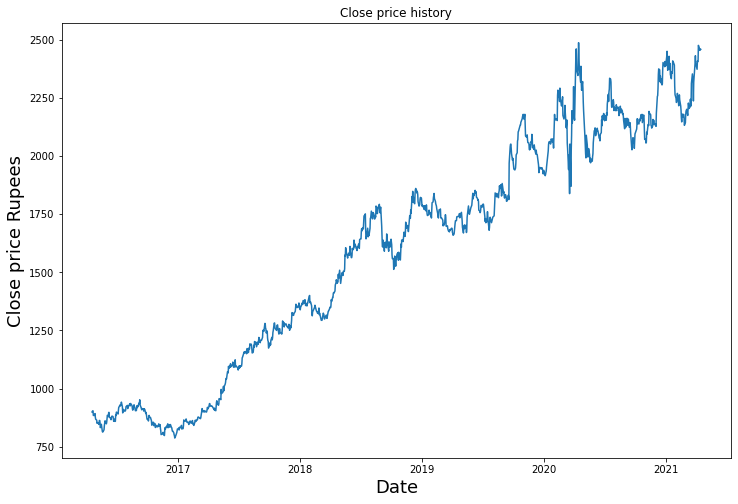

In [ ]:
plt.figure(figsize=(12,8))
plt.title('Close price history')
plt.plot(df['Close'])
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close price Rupees',fontsize=18)
plt.show()

##Preprocessing - Train Data

Taking 70% of the df (closing price data) for training

In [ ]:
import math
train_size=math.ceil(len(df_1)*.7) 
train_size

864

Normalising train data

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
scaled=scaler.fit_transform(df_1)
scaled

array([[0.06592181],
       [0.06883269],
       [0.06880329],
       ...,
       [0.98050565],
       [0.98418104],
       [0.98315193]])

Updating x_train and y_train

In [ ]:
train_data=scaled[0:train_size,:]
x_train=[]
y_train=[]
for i in range(60,len(train_data)):
	x_train.append(train_data[i-60:i,0])
	y_train.append(train_data[i,0])

	if i<=61:
		print(x_train)
		print(y_train)

[array([0.06592181, 0.06883269, 0.06880329, 0.05713027, 0.05710087,
       0.05804176, 0.06183477, 0.05245517, 0.04754486, 0.04522201,
       0.03760659, 0.03901796, 0.03710675, 0.03901796, 0.03437225,
       0.04433991, 0.0443987 , 0.03878272, 0.02631579, 0.0348133 ,
       0.02763893, 0.022611  , 0.01649514, 0.0149074 , 0.01914142,
       0.02119964, 0.0311967 , 0.03722434, 0.04360483, 0.03957659,
       0.03596002, 0.04004707, 0.04772127, 0.05751249, 0.05427814,
       0.06468685, 0.06477508, 0.05257279, 0.05151428, 0.05124964,
       0.04625112, 0.05151428, 0.05433697, 0.05545427, 0.05430758,
       0.04892679, 0.04245811, 0.04839752, 0.04236988, 0.04222287,
       0.05921788, 0.05689503, 0.06556895, 0.06501028, 0.06233461,
       0.06065864, 0.07718318, 0.07859454, 0.08371069, 0.08129961])]
[0.08256396317245401]
[array([0.06592181, 0.06883269, 0.06880329, 0.05713027, 0.05710087,
       0.05804176, 0.06183477, 0.05245517, 0.04754486, 0.04522201,
       0.03760659, 0.03901796, 0.037

Shape of x_train and y_train

In [ ]:
x_train,y_train=np.array(x_train),np.array(y_train)
x_train=np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))
x_train.shape

(804, 60, 1)

##Training - using LSTMs

In [ ]:
from keras.models import Sequential
from keras.layers import Dense,LSTM

In [ ]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(x_train.shape[1],1)))
model.add(LSTM(50,return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [ ]:
model.compile(optimizer='adam',loss='mean_squared_error')

In [ ]:
model.fit(x_train,y_train,batch_size=1,epochs=1)

804/804 [==============================] - 23s 25ms/step - loss: 0.0028


##Preprocessing - Test Data

In [ ]:
test_data=scaled[train_size-60:,:]
x_test=[]
y_test=df_1[train_size:,:]
for i in range(60,len(test_data)):
	x_test.append(test_data[i-60:i,0])

In [ ]:
x_test=np.array(x_test)
x_test=np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))

##Prediction

In [ ]:
prediction=model.predict(x_test)
prediction=scaler.inverse_transform(prediction)

In [ ]:
valid=data[train_size:]
valid

,Close
Date,
2019-10-22,2127.350098
2019-10-23,2133.250000
2019-10-24,2133.350098
2019-10-25,2145.100098
2019-10-29,2160.199951
...,...
2021-04-09,2476.000000
2021-04-12,2462.000000
2021-04-13,2454.399902


##Plotting the Valid and the Predictions

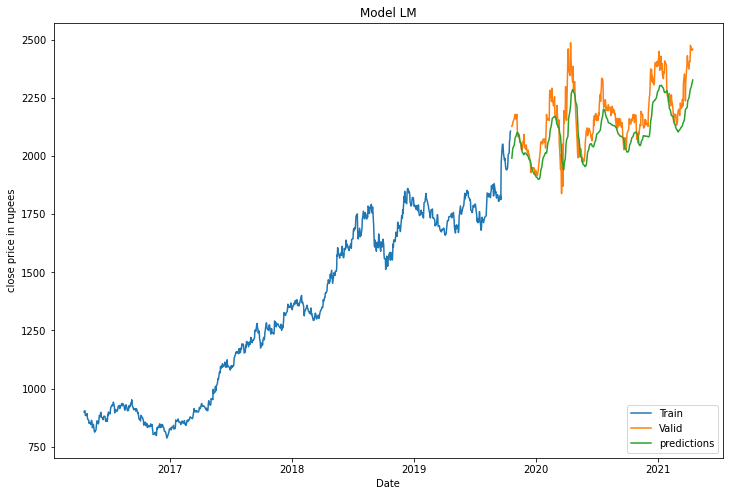

In [ ]:
train=data[:train_size]
valid=data[train_size:]
valid['predictions']=prediction
plt.figure(figsize=(12,8))
plt.title('Model LM')
plt.xlabel('Date')
plt.ylabel('close price in rupees')
plt.plot(train['Close'])
plt.plot(valid[['Close','predictions']])
plt.legend(['Train','Valid','predictions'],loc='lower right')
plt.show()

#Times of India HeadLines - Sentiment Analysis

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
%cd /content/drive/MyDrive/Colab Notebooks/Data Science and Business Analytics - Spark Internship/Task 7 - Stock Market Prediction

/content/drive/MyDrive/Colab Notebooks/Data Science and Business Analytics - Spark Internship/Task 7 - Stock Market Prediction


##Importing data

In [ ]:
raw=pd.read_csv('news.csv')
raw.head()

,publish_date,headline_category,headline_text
0,20010102,unknown,Status quo will not be disturbed at Ayodhya; s...
1,20010102,unknown,Fissures in Hurriyat over Pak visit
2,20010102,unknown,America's unwanted heading for India?
3,20010102,unknown,For bigwigs; it is destination Goa
4,20010102,unknown,Extra buses to clear tourist traffic


##Exploring Data

In [ ]:
raw.tail()


,publish_date,headline_category,headline_text
3424062,20201231,city.jodhpur,Covid-19: Despite dip in cases; Rajasthan amon...
3424063,20201231,city.udaipur,Covid-19: Despite dip in cases; Rajasthan amon...
3424064,20201231,city.ajmer,Covid-19: Despite dip in cases; Rajasthan amon...
3424065,20201231,removed,Govt extends deadline for use of FASTag till F...
3424066,20201231,entertainment.bengali.movies.news,Celebs plan to party safely and responsibly on...


In [ ]:
raw_df=raw[['headline_text']].copy()
raw_df

,headline_text
0,Status quo will not be disturbed at Ayodhya; s...
1,Fissures in Hurriyat over Pak visit
2,America's unwanted heading for India?
3,For bigwigs; it is destination Goa
4,Extra buses to clear tourist traffic
...,...
3424062,Covid-19: Despite dip in cases; Rajasthan amon...
3424063,Covid-19: Despite dip in cases; Rajasthan amon...
3424064,Covid-19: Despite dip in cases; Rajasthan amon...
3424065,Govt extends deadline for use of FASTag till F...


In [ ]:
raw_df.head()

,headline_text
0,Status quo will not be disturbed at Ayodhya; s...
1,Fissures in Hurriyat over Pak visit
2,America's unwanted heading for India?
3,For bigwigs; it is destination Goa
4,Extra buses to clear tourist traffic


In [ ]:
raw_df.isnull().sum()

headline_text    0
dtype: int64

In [ ]:
raw_df=raw_df.iloc[:15000,:]
raw_df.head()

,headline_text
0,Status quo will not be disturbed at Ayodhya; s...
1,Fissures in Hurriyat over Pak visit
2,America's unwanted heading for India?
3,For bigwigs; it is destination Goa
4,Extra buses to clear tourist traffic


In [ ]:
raw_df.shape

(15000, 1)

##Importing Libraries

In [ ]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [ ]:
nltk.download('vader_lexicon')
nltk.download('stopwords')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

##Sentiment Intensity Analyzer

Positive, Negative and Neutral

In [ ]:
sid=SentimentIntensityAnalyzer()
result=[]
for line in raw_df['headline_text']:
	scores=sid.polarity_scores(line)
	scores['headline']=line
	result.append(scores)
rev=pd.DataFrame(result)
rev.head()

,neg,neu,pos,compound,headline
0,0.000,0.805,0.195,0.2924,Status quo will not be disturbed at Ayodhya; s...
1,0.000,1.000,0.000,0.0000,Fissures in Hurriyat over Pak visit
2,0.322,0.678,0.000,-0.2263,America's unwanted heading for India?
3,0.000,1.000,0.000,0.0000,For bigwigs; it is destination Goa
4,0.000,0.658,0.342,0.3818,Extra buses to clear tourist traffic


In [ ]:
rev.shape

(15000, 5)

##Labelling with respect to Intensity

In [ ]:
ratings=[]
for row in rev['compound']:
  if row >= 0.05 :
      ratings.append(1)
  elif row <= - 0.05 :
    ratings.append(-1)
  else :
    ratings.append(0)

rev['scores']=ratings
rev.head()

,neg,neu,pos,compound,headline,scores
0,0.000,0.805,0.195,0.2924,Status quo will not be disturbed at Ayodhya; s...,1
1,0.000,1.000,0.000,0.0000,Fissures in Hurriyat over Pak visit,0
2,0.322,0.678,0.000,-0.2263,America's unwanted heading for India?,-1
3,0.000,1.000,0.000,0.0000,For bigwigs; it is destination Goa,0
4,0.000,0.658,0.342,0.3818,Extra buses to clear tourist traffic,1


##Total by Sentiment Labels

In [ ]:
rev['scores'].value_counts()

 0    8145
-1    3883
 1    2972
Name: scores, dtype: int64

##Percentage by Sentiment Labels

In [ ]:
a=rev['scores'].value_counts(normalize=True)*100
a


 0    54.300000
-1    25.886667
 1    19.813333
Name: scores, dtype: float64

##Plotting Sentiment Distribution

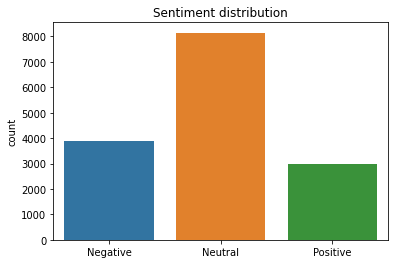

In [ ]:
import seaborn as sns
f = sns.countplot(x='scores', data=rev)
f.set_title("Sentiment distribution")
f.set_xticklabels(['Negative', 'Neutral','Positive'])
plt.xlabel("");

##Analysing words by Sentiment labels 

###Visualising using Word Cloud

<Figure size 864x576 with 0 Axes>

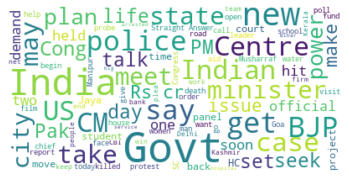

In [ ]:
from wordcloud import WordCloud
from nltk.corpus import stopwords
text = " ".join(review for review in rev.headline)
plt.figure(figsize=(12,8))
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white", stopwords=stopwords.words("english")).generate(text)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show();

###Converting headlines into lists

In [ ]:
z=rev['headline'].values.tolist()
z[0:5]

['Status quo will not be disturbed at Ayodhya; says Vajpayee',
 'Fissures in Hurriyat over Pak visit',
 "America's unwanted heading for India?",
 'For bigwigs; it is destination Goa',
 'Extra buses to clear tourist traffic']

### Importing Libraries

In [ ]:
from nltk.tokenize import word_tokenize, RegexpTokenizer
from nltk.corpus import stopwords

stop_words = stopwords.words('english')
tokenizer = RegexpTokenizer(r'\w+')

###Tokenizing words and Removing StopWords

Stop words are words like i,me,my,myself,we,our,ours

In [ ]:
def process_text(z):
    tokens = []
    for line in z:
        toks = tokenizer.tokenize(line)
        toks = [t.lower() for t in toks if t.lower() not in stop_words]
        tokens.extend(toks)
    
    return tokens

###Most Common Words in Positive Labels

In [ ]:
pos_lines = list(rev[rev.scores == 1].headline)

pos_tokens = process_text(pos_lines)
pos_freq = nltk.FreqDist(pos_tokens)

pos_freq.most_common(5)

[('govt', 125),
 ('straight', 94),
 ('answers', 86),
 ('india', 84),
 ('relief', 60)]

<Figure size 864x576 with 0 Axes>

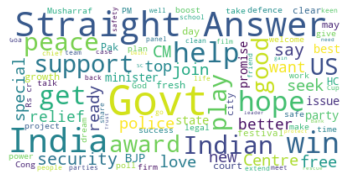

In [ ]:
text = " ".join(review for review in rev[rev.scores==1].headline)
plt.figure(figsize=(12,8))
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white", stopwords=stopwords.words("english")).generate(text)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show();

###Most Common Words in Neutral Labels

In [ ]:
neu_lines = list(rev[rev.scores == 0].headline)

neu_tokens = process_text(neu_lines)
neu_freq = nltk.FreqDist(neu_tokens)

neu_freq.most_common(5)

[('govt', 297), ('india', 262), ('new', 194), ('rs', 135), ('police', 124)]

<Figure size 864x576 with 0 Axes>

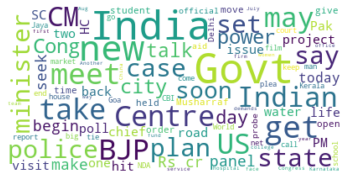

In [ ]:
text = " ".join(review for review in rev[rev.scores==0].headline)
plt.figure(figsize=(12,8))
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white", stopwords=stopwords.words("english")).generate(text)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show();

###Most Common Words in Negative Labels

In [ ]:
neg_lines = list(rev[rev.scores == -1].headline)

neg_tokens = process_text(neg_lines)
neg_freq = nltk.FreqDist(neg_tokens)

neg_freq.most_common(5)

[('govt', 162), ('killed', 148), ('police', 99), ('case', 89), ('death', 87)]

<Figure size 864x576 with 0 Axes>

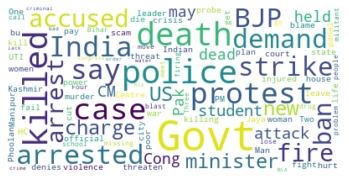

In [ ]:
text = " ".join(review for review in rev[rev.scores==-1].headline)
plt.figure(figsize=(12,8))
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white", stopwords=stopwords.words("english")).generate(text)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show();